# Welcome to this Jupyter Notebook!
## Step 0 - Rename this file
Up at the top of this window, you should see that the name of this file is `water_vapor_variables_[lastname]_[firstname]`. Click it, and change `[lastname]` to your last name, and `[firstname]` to, say, your first name.

### A note about Docker
Changes you make to this Notebook will last as long as your Docker Container does. But if you delete your container, your changes will be lost. If you re-create a container from the image I gave you, you'll be starting fresh.

### About the code (for first-timers)
The first lines of code below are "import" statements. If you're not familiar with Python, it is a general-purpose interpreted language, and to get more specific functionality (like for atmospheric science), people write packages (like metpy or xarray) to extend python's functionality. You probably installed these packages yourself a few minutes ago.

This next line after that sets up some map plotting preferences.

The block after that defines a function used to plot the same coastlines, state lines, and 
country borders in each of the two plots you will later make.

## Step 2 - Run some code...
Go ahead and click on the block of code below and click "Run" above, or press shift+enter on your keyboard to run the code.

**This first chunk of code might take a minute.** "import" lines take a little while.

In [2]:
# these import lines open up software that makes python
# more able to do science and display the results
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
from metpy.plots import add_metpy_logo

# Center the map view over the continental United States
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Function used to create the map subplots
def plot_background(ax):
    ax.set_extent([235., 290., 20., 55.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    return ax

## Step 3 - Read some data
In order to read in the data to plot for this assignment, you will need to be sure to have the NAM (North American Mesoscale) model output in the same directory as the jupyter notebook file. If you're running this code online, the file is already where it needs to be, and you can run the code below. If you downloaded the code to your computer and created a virtual environment to run it, be sure to download the NAM data first.

If you're not sure what all that meant, then just run the code below. It'll take a few seconds.

In [3]:
# open the grib dataset and store it in a variable "ds"
ds = xr.open_dataset('nam.t00z.awip3d00.tm00.grib2', engine='cfgrib', filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'})

# read in the longitude and latitude data into variables "lon_2d" and "lat_2d"
lon_2d, lat_2d = ds['longitude'], ds['latitude']

# Read the specific humidity and temperature data into variables
# "specific_humidity" and "air_temp". That's how you'll refer
# to these variables in the rest of this notebook
specific_humidity = ds['q']
air_temp = ds['t']

## Step 4 - Code up your calculations
Use the material in §3.4.2 and §3.4.3 to calculate in the cell below the mixing ratio and virtual temperature using the specific humidity and air temperature you read in the cell above. (You will need to uncomment the code; I used block comments, which in python consist of three apostrophies at the beginning and at the end of the commented-out code. Delete the two sets of three apostrophes and edit the code.)

_HINT:_ the virtual temperature calculation below will make use of both `air_temp` and `specific_humidity`. In order to give `virt_temp` the attriburtes of `air_temp` (including the units of Kelvins), you will want to replace `specific_humidity` in your `virt_temp` calculation below `specific_humidity.data`. This will use just the numbers from `specific_humidity`, ignore its other attributes, and use the attributes from `air_temp` instead. (If you do not do this, the unit conversions will fail.)

In [ ]:
'''
# code up the expression for mixing ratio in terms of specific humidity.
# Refer to specific humidity as  "specific_humidity" here
mixing_ratio = 

R_dry_air =  # put a correct value after the equal sign
R_water_vapor = # put a correct value after the equal sign

# put an expression for epsilon in terms of R_dry_air and R_water_vapor below.
# I don't want you to just put "0.622".
epsilon = 

# Now code up an expression for virt_temp in terms of specific humidity again,
# but refer to specific humidity as "specific_humidity.data" here,
# rather than "specific_humidity" like you did above (hopefully).
# The reasons are technical.
virt_temp = 
'''

## Step 5 - Inspect your data to be sure it looks good
Uncomment the code in the cells below by deleting the `'''` before and after each thing. Run the first to inspect `mixing_ratio`, including its attributes and some of its values. Be sure it has the same units as `specific_humidity`. Do the same thing with `virt_temp`. Make sure it has reasonable values and similar units as `air_temp`.

In [5]:
'''mixing_ratio'''

'mixing_ratio'

In [6]:
'''virt_temp'''

'virt_temp'

## Step 6 - Improve the plots!
### You'll get red warning messages; just scroll past them to the plots.
The code below should run just fine as-is, because I commented out (using '''block comments''') all the bits of code dealing with mixing ratio and virtual temperature.

To start with, go ahead and run the code as-is. If all goes well, it should create a pair of plots--one of specific humidity, and one of temperature.

Once you've double-checked the plotting code and gotten a couple of plots, go ahead and start uncommenting the code snippets that have to do with `mixing_ratio` and `virt_temp`. When you are done, you should end up with two plots, each with two sets of contour lines and a set of filled contours.

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/crs.py

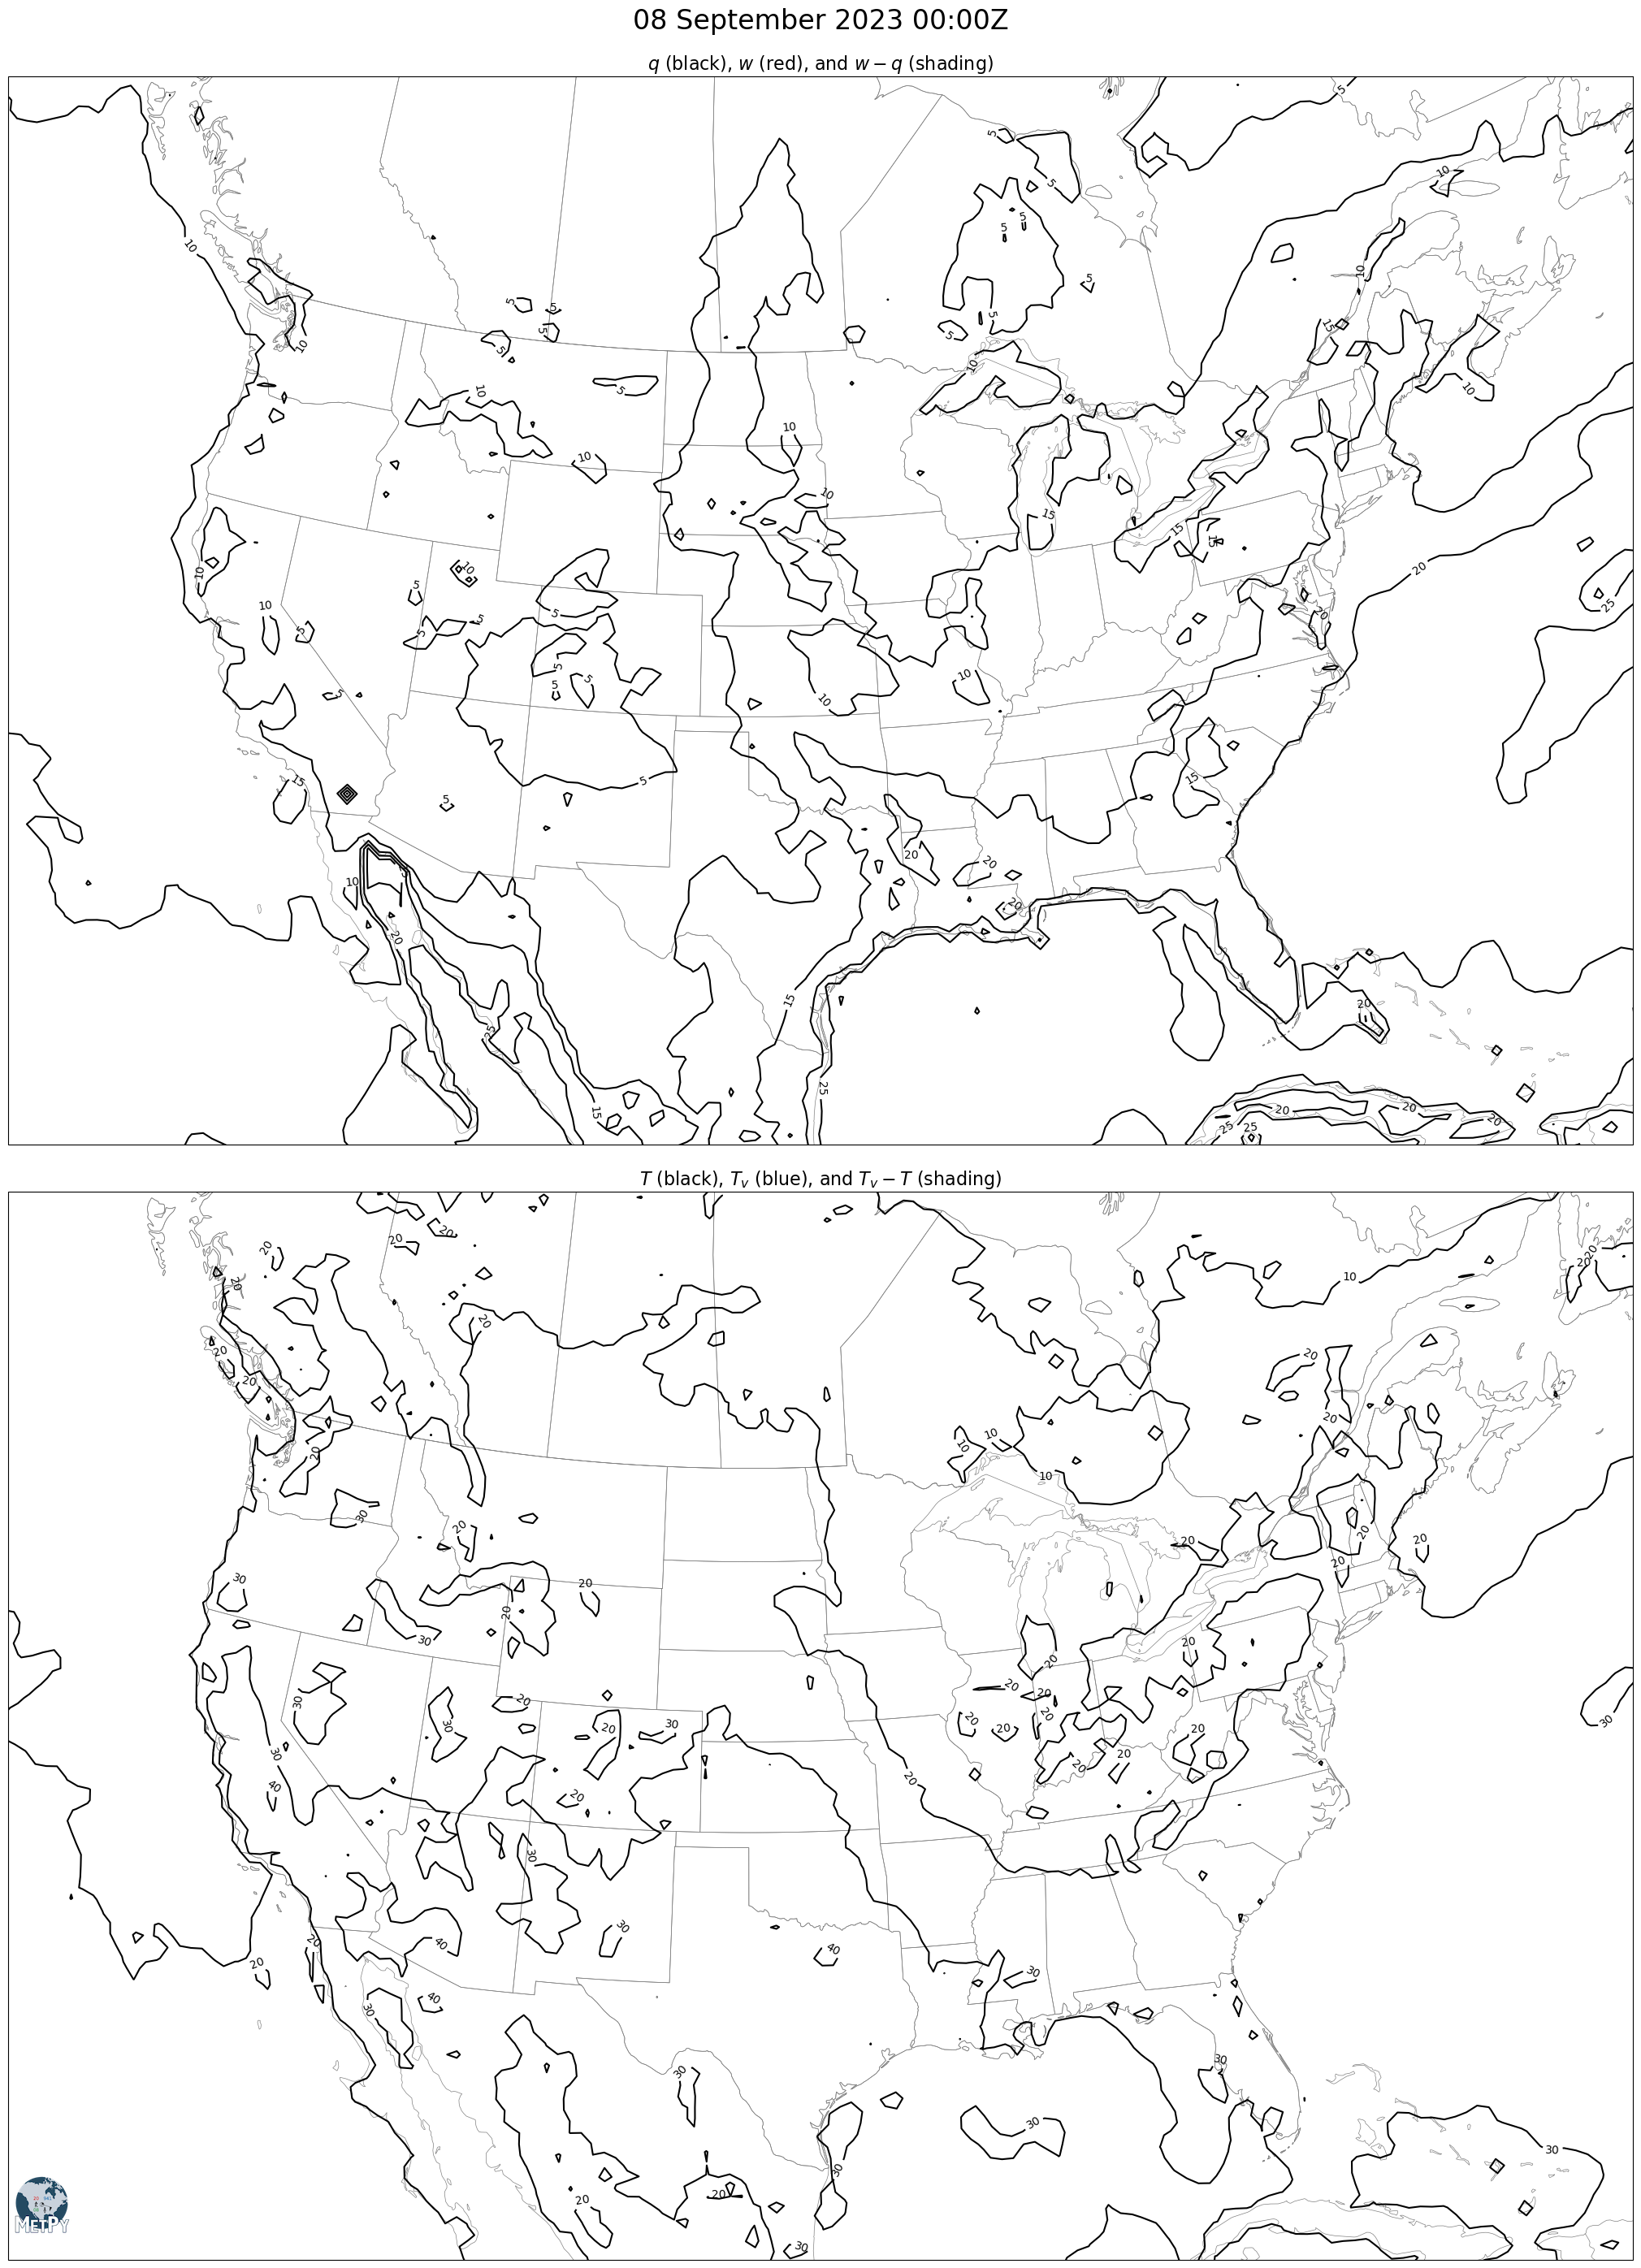

In [7]:
# convert units
specific_humidity = specific_humidity.metpy.convert_units('g kg**-1')
air_temp = air_temp.metpy.convert_units('degC')
'''
mixing_ratio = mixing_ratio.metpy.convert_units('g kg**-1')
virt_temp = virt_temp.metpy.convert_units('degC')
'''

# Create the figure and plot background on different axes
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(20, 28), constrained_layout=True,
                          subplot_kw={'projection': crs})
add_metpy_logo(fig, 14, 40, size='small')
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)

# Upper left plot - specific humidity
c1a = axlist[0].contour(lon_2d, lat_2d, specific_humidity, [5, 10, 15, 20, 25, 30], colors='black',
                       transform=ccrs.PlateCarree())
'''
c1b = axlist[0].contour(lon_2d, lat_2d, mixing_ratio, [5, 10, 15, 20, 25, 30], colors='red',
                       transform=ccrs.PlateCarree())
cf1 = axlist[0].contourf(lon_2d, lat_2d, mixing_ratio-specific_humidity, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], cmap='GnBu',
                       transform=ccrs.PlateCarree(), zorder=0)
'''
axlist[0].clabel(c1a, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
'''
axlist[0].clabel(c1b, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='horizontal', shrink=0.74, pad=0)
cb1.set_label('g kg$^{-1}$', size='x-large')
'''

axlist[0].set_title('$q$ (black), $w$ (red), and $w-q$ (shading)', fontsize=16)

# Lower left plot - surface temperatures
c2a = axlist[1].contour(lon_2d, lat_2d, air_temp, [10, 20, 30, 40], colors='black',
                         transform=ccrs.PlateCarree())
'''
c2b = axlist[1].contour(lon_2d, lat_2d, virt_temp, [10, 20, 30, 40], colors='blue',
                         transform=ccrs.PlateCarree())
cf2 = axlist[1].contourf(lon_2d, lat_2d, virt_temp-air_temp, [1, 2, 3, 4, 5], cmap='OrRd',
                       transform=ccrs.PlateCarree(), zorder=0)
'''
axlist[1].clabel(c2a, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
'''
axlist[1].clabel(c2b, fontsize=10, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
cb2 = fig.colorbar(cf2, ax=axlist[1], orientation='horizontal', shrink=0.74, pad=0)
cb2.set_label('$^\circ$C', size='x-large')
'''
axlist[1].set_title('$T$ (black), $T_v$ (blue), and $T_v-T$ (shading)', fontsize=16)

# Set height padding for plots
fig.set_constrained_layout_pads(w_pad=0., h_pad=0.1, hspace=0., wspace=0.)

# Set figure title
fig.suptitle(ds['time'].dt.strftime('%d %B %Y %H:%MZ').values, fontsize=24)

# Display the plot
plt.show()

## Step 6 - Turn this in!
Once your plots look good, save your jupyter notebook as an html file; Go to the "File" menu just below the jupyter logo, choose "Save and Export Notebook As", and then "HTML". An html file containing yo

If you are running this online, **download the notebook file**. Do not close this browser tab until you are sure you have downloaded this! Your Jupyter Notebook file will be your canvas submission!